# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import key_weathermap
from datetime import date

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/cities.xlsx"

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={key_weathermap}&units={units}&q="

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name  
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
w=len(cities)
# city.country_code

In [3]:
#This lines were to check the type of response/order data from the API to process it later on
#response = requests.get(query_url + cities[15]).json()
#response

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# set up lists to save API reponses for later processing
cities_ret=[]
code=[]
lat = []
temp = []
humid =[]
cloud=[]
wind =[]
# Loop through the list of cities and perform a request for data on each
for city in cities:
#Getting date of data retrieval for later plot in graph for reference
    today=date.today()
#Exception error handling when a city isn't found to skip and continue the process with the rest of the list
    try:
        response = requests.get(query_url + city).json()
        cities_ret.append(response['name'])
        code.append(response['id'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        print(f"--Processing record {city} of {w}")
    except KeyError:
        print("City not found, skipping...")
print("Data retrieval completed")

--Processing record isangel of 606
--Processing record tasiilaq of 606
--Processing record provideniya of 606
--Processing record skibbereen of 606
--Processing record hermanus of 606
--Processing record new norfolk of 606
--Processing record cape town of 606
--Processing record clinton of 606
--Processing record dingle of 606
--Processing record loiza of 606
--Processing record port alfred of 606
--Processing record zhaotong of 606
--Processing record torbay of 606
--Processing record mokhsogollokh of 606
--Processing record ushuaia of 606
City not found, skipping...
--Processing record albany of 606
--Processing record mahebourg of 606
--Processing record vanavara of 606
--Processing record biograd na moru of 606
--Processing record airai of 606
--Processing record nanortalik of 606
--Processing record thompson of 606
--Processing record fortuna of 606
--Processing record namibe of 606
--Processing record bathsheba of 606
--Processing record mananjary of 606
--Processing record kruis

--Processing record silver city of 606
--Processing record ottumwa of 606
--Processing record bokovskaya of 606
--Processing record vila velha of 606
--Processing record kavieng of 606
--Processing record te anau of 606
--Processing record katobu of 606
--Processing record maningrida of 606
--Processing record babu of 606
--Processing record caledon of 606
--Processing record tazovskiy of 606
City not found, skipping...
--Processing record saint-philippe of 606
--Processing record mungeli of 606
--Processing record nieuw amsterdam of 606
--Processing record nanakuli of 606
--Processing record ati of 606
--Processing record adre of 606
--Processing record buin of 606
--Processing record wanaka of 606
--Processing record chifeng of 606
--Processing record sura of 606
--Processing record hasaki of 606
--Processing record zhuhai of 606
--Processing record sayyan of 606
--Processing record puerto penasco of 606
--Processing record tautira of 606
--Processing record caraballeda of 606
--Proc

--Processing record nabire of 606
--Processing record mubi of 606
City not found, skipping...
--Processing record tuy hoa of 606
--Processing record nioro of 606
--Processing record ola of 606
--Processing record sabzevar of 606
--Processing record markdale of 606
--Processing record inirida of 606
--Processing record plettenberg bay of 606
--Processing record grand gaube of 606
--Processing record parkersburg of 606
--Processing record nyrob of 606
--Processing record bubaque of 606
--Processing record satinka of 606
--Processing record iqaluit of 606
--Processing record barinas of 606
--Processing record san quintin of 606
City not found, skipping...
--Processing record zhangye of 606
--Processing record daru of 606
--Processing record aksu of 606
--Processing record shizunai of 606
--Processing record bodmin of 606
--Processing record half moon bay of 606
City not found, skipping...
--Processing record morwell of 606
--Processing record naica of 606
--Processing record sibolga of 60

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a data frame with retrieved info
weather_dict = {
    "City": cities_ret,
    "Id":code,
    "Latitude": lat,
    "Temp [C]": temp,
    "Humidity":humid,
    "Cloudiness":cloud,
    "Wind Speed":wind}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Id,Latitude,Temp [C],Humidity,Cloudiness,Wind Speed
0,Isangel,2136825,-19.55,22.65,77,0,6.63
1,Tasiilaq,3424607,65.61,8.00,75,75,2.60
2,Provideniya,4031574,64.42,20.15,37,0,1.62
3,Skibbereen,2961459,51.55,16.00,93,75,5.70
4,Hermanus,3366880,-34.42,13.28,92,0,2.72


In [12]:
weather_data.to_excel(output_data_file, index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot

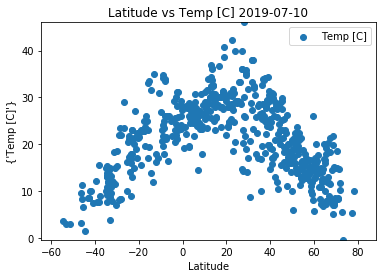

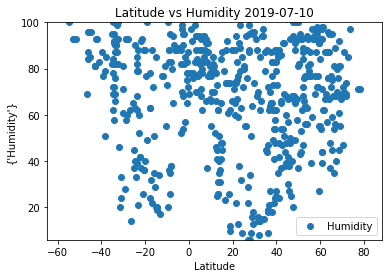

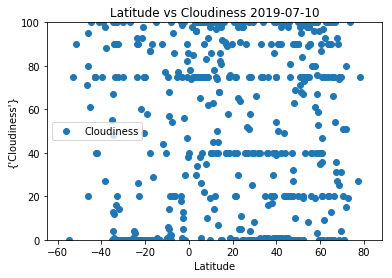

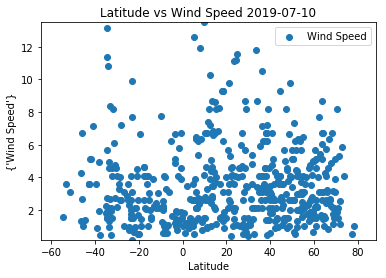

In [17]:
#Loop that plots 4 scatter plots required with the initial list provided
list = ["Temp [C]","Humidity","Cloudiness","Wind Speed"]
for i in list:
    x_axis = weather_data["Latitude"]
    plt.scatter(x_axis,weather_data[i])
    #Plot data format for easier reading, axes labeling, title, legend location, etc
    plt.xlim(min(x_axis-10), max(x_axis+10))
    plt.ylim(min(weather_data[i]),max(weather_data[i]))
    plt.title(f"Latitude vs {i} {today}")
    plt.xlabel("Latitude")
    plt.ylabel({i})
    plt.legend(loc="best")
    plt.savefig(f"Images/lat-{i}.jpg")
    plt.show()

In [15]:
#Observed trends
print("Trend 1: Temperature is higher as latitude approaches to zero(Equator) as it can be observed in Lat vs Temp graph")
print("Trend 2: Humidity doesn't present a direct observable pattern with latitude, thus it dependes in other factors, possibly related to specific city geography")
print("Trend 3: Wind speed doesn't present a direct observable pattern with latitude, it depends in other unidentified factors")
print("Trend 4: Cloudiness doesn't present a direct observable pattern with latitude, it depends in other unidentified factors")

Trend 1: Temperature is higher as latitude approaches to zero(Equator) as it can be observed in Lat vs Temp graph
Trend 2: Humidity doesn't present a direct observable pattern with latitude, thus it dependes in other factors, possibly related to specific city geography
Trend 3: Wind speed doesn't present a direct observable pattern with latitude, it depends in other unidentified factors
Trend 4: Cloudiness doesn't present a direct observable pattern with latitude, it depends in other unidentified factors
